# Notebook to recreate reflectance diagram created in Nakajima and King

> Using the cloud_atm.csv file
- single layer of cloud with Rayleigh scattering

## Constant Effective Radius; varying dTau

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("../create_atm/atmospheres/cloud_atm.csv", header = None, index_col = 0)

In [3]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
0.25,0.028212,0.014515,0.015801,0.014595,0.013082,0.012733,0.024992,0.006230,0.002692,0.003116,0.001897,0.001273
0.50,0.046585,0.018691,0.021410,0.018822,0.015481,0.014784,0.046516,0.015450,0.006433,0.006963,0.004326,0.002973
1.00,0.080804,0.028815,0.034447,0.028892,0.021465,0.020078,0.077481,0.037160,0.016761,0.016723,0.010802,0.007795
2.00,0.132266,0.052225,0.062483,0.051842,0.036603,0.033964,0.106944,0.077158,0.042323,0.040155,0.027461,0.020854
4.00,0.190049,0.094808,0.109889,0.094429,0.069448,0.065109,0.120167,0.128271,0.087946,0.083969,0.061510,0.048507
8.00,0.239587,0.150441,0.167344,0.150767,0.120674,0.115109,0.121829,0.172889,0.143915,0.140247,0.107205,0.085494
16.00,0.273515,0.206248,0.219676,0.204939,0.177599,0.172074,0.121852,0.196478,0.194736,0.191968,0.144580,0.113057
32.00,0.291948,0.249910,0.256777,0.245017,0.225830,0.221521,0.121851,0.201489,0.225991,0.224496,0.160581,0.122254


In [4]:
len(df)

8

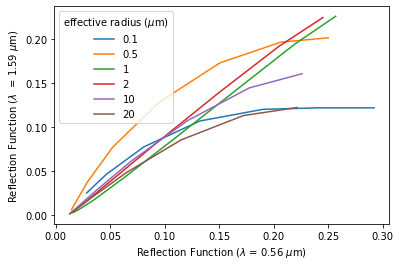

In [5]:
N_cloud = int(df.shape[1]/2)

for i in range(N_cloud):
    plt.plot(df[1+i], df[7+i])

plt.legend(['0.1','0.5','1','2','10','20'], title='effective radius ($\mu$m)')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')
plt.show()

## Constant dTau; varying effective radius

In [6]:
import copy

In [7]:
df2 = df.T

In [8]:
df2

,0.25,0.50,1.00,2.00,4.00,8.00,16.00,32.00
1,0.028212,0.046585,0.080804,0.132266,0.190049,0.239587,0.273515,0.291948
2,0.014515,0.018691,0.028815,0.052225,0.094808,0.150441,0.206248,0.249910
3,0.015801,0.021410,0.034447,0.062483,0.109889,0.167344,0.219676,0.256777
4,0.014595,0.018822,0.028892,0.051842,0.094429,0.150767,0.204939,0.245017
5,0.013082,0.015481,0.021465,0.036603,0.069448,0.120674,0.177599,0.225830
6,0.012733,0.014784,0.020078,0.033964,0.065109,0.115109,0.172074,0.221521
7,0.024992,0.046516,0.077481,0.106944,0.120167,0.121829,0.121852,0.121851
8,0.006230,0.015450,0.037160,0.077158,0.128271,0.172889,0.196478,0.201489
9,0.002692,0.006433,0.016761,0.042323,0.087946,0.143915,0.194736,0.225991
10,0.003116,0.006963,0.016723,0.040155,0.083969,0.140247,0.191968,0.224496


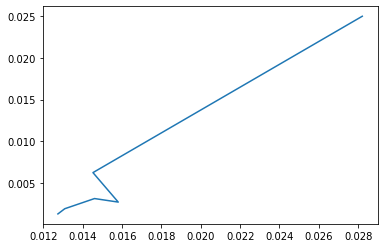

In [9]:
plt.plot(df2[0.25][0:6], df2[0.25][6:12])

In [10]:
dTau_range_cloud = []

for col in df2.columns:
    dTau_range_cloud.append(col)

In [11]:
dTau_range_cloud

[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]

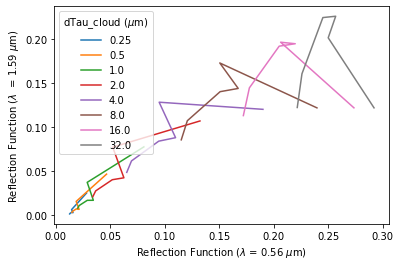

In [12]:
N_dTau_cloud = len(dTau_range_cloud)

fig, ax = plt.subplots()

for i in range(N_dTau_cloud):
    x = df2[dTau_range_cloud[i]][0:6]
    y = df2[dTau_range_cloud[i]][6:12]
    
    plt.plot(x,y)
    #ax.annotate(dTau_range_cloud, (x[i], y[i]))
    
plt.legend(dTau_range_cloud, title='dTau_cloud ($\mu$m)')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')

plt.show()

> single plot only 

In [13]:
x = []
y = []

for i in range(N_cloud):
    x.append(df2[0.25][i+1])
    y.append(df2[0.25][i+7])
    
n = ['0.1','0.5','1','2','10','20']

<function matplotlib.pyplot.show(close=None, block=None)>

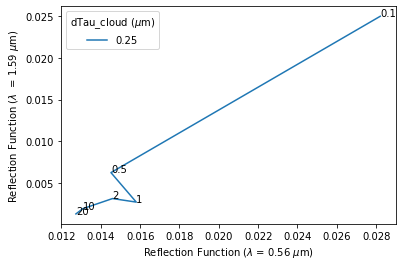

In [14]:
fig, ax = plt.subplots()
ax.plot(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
    
plt.legend(dTau_range_cloud, title='dTau_cloud ($\mu$m)')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')
plt.show